# Modelgrid and intersection

The first part of this notebook is focused on the `flopy.discretization.Grid` (modelgrid) object(s). The modelgrid object(s) are a relatively new addition to FloPy's capabilities and are the backbone of plotting, exporting, and GIS data processing within FloPy. These objects are automatically created when a model is loaded. Alternatively they can also be created as a stand alone object. 

There are three types of modelgrids:

* `StructuredGrid`: the StructuredGrid object is created for rectilinear grids. i.e. models that use a DIS file for discretization
* `VertexGrid`: the VertexGrid object is for discretizations that are defined by vertices (e.g., DISV packages)
* `UnstructuredGrid`: the UnstructuredGrid object is for unstructured discretizations (e.g., DISU and MODFLOW-USG)

These objects all have a common interface defined by the base `Grid` class. What this means for the user is if they want to get the cell center coordinates from a modelgrid, the function call is identical on all three grids.

The best way to learn about these classes is by checking them out. 

In [1]:
import os
import flopy

import numpy as np
import matplotlib.pyplot as plt

## Grids

## StructuredGrid

Let's start with the most common type of MODFLOW modelgrid, the `StructuredGrid`

#### First we'll build one from scratch 

In [20]:
nrow = 20
ncol = 15
nlay = 1

grad = np.expand_dims(np.linspace(50, 100, nrow), axis=1)[::-1]
top = np.ones((nrow, ncol)) * grad
botm = np.zeros((nlay, nrow, ncol))
botm[0, :, :] = top - 50 
delr = np.full((ncol,), 250)
delc = np.full((nrow,), 150)
ibound = np.ones((nlay, nrow, ncol))
ibound[0, 4:10, 4:8] = 0

modelgrid = flopy.discretization.StructuredGrid(
    delc,
    delr,
    top,
    botm,
    ibound,
)
print(modelgrid)
print(type(modelgrid))

xll:0.0; yll:0.0; rotation:0.0; units:undefined; lenuni:0
<class 'flopy.discretization.structuredgrid.StructuredGrid'>


Let's take a look at our modelgrid visually

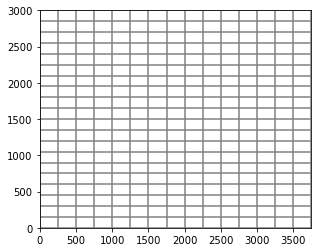

In [22]:
modelgrid.plot();

This is great, but what if we want to orient it in space and add a coordinate reference system so we can do further processing? 

The `set_coord_info()` method allows us to update the coordinate offsets, rotation of the grid, and even add projection information.

In [24]:
xoff = 2345678
yoff = 1234567
angrot = -15
epsg = 32610  # utm zone 10N

modelgrid.set_coord_info(xoff=xoff, yoff=yoff, angrot=angrot, epsg=epsg)
epsg

32610

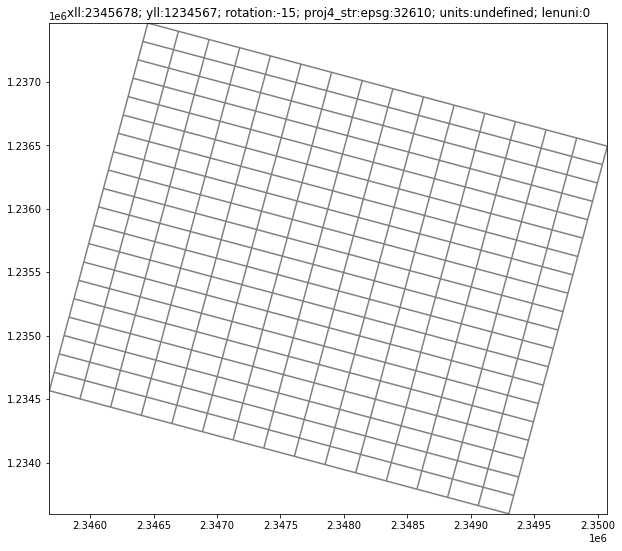

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = modelgrid.plot(ax=ax)
plt.title(str(modelgrid));

### Getting cell centers and cell vertices

* Cell centers can be returned to the user through the `.xcellcenters`, `.ycellcenter`, and `.zcellcenter` properties.
* Cell vertices can be returned to the user through the `.xvertices` and `.yvertices` properties

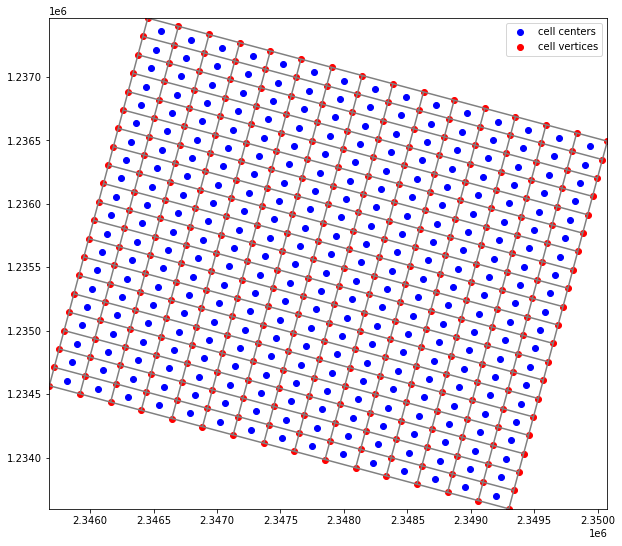

In [28]:
xc, yc = modelgrid.xcellcenters, modelgrid.ycellcenters
xv, yv = modelgrid.xvertices, modelgrid.yvertices

fig, ax = plt.subplots(figsize=(10, 10))
modelgrid.plot()
ax.scatter(xc.ravel(), yc.ravel(), c="b", label="cell centers")
ax.scatter(xv.ravel(), yv.ravel(), c="r", label="cell vertices")
plt.legend(loc=0);

### Getting the ibound/idomain array

The `.idomain` method returns the ibound/idomain array

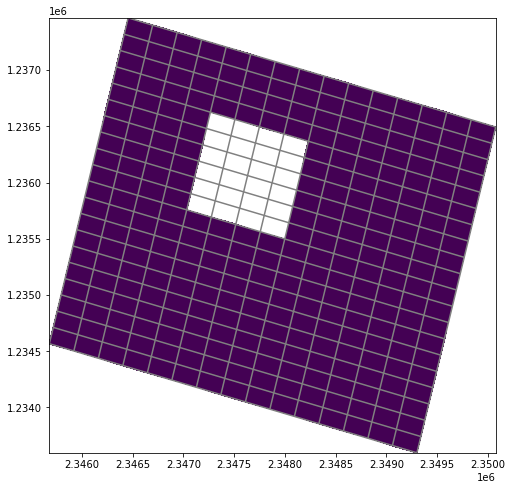

In [32]:
ibound = modelgrid.idomain

fig, ax = plt.subplots(figsize=(8, 8))
pmv = flopy.plot.PlotMapView(modelgrid=modelgrid, ax=ax)
pmv.plot_grid()
pmv.plot_array(ibound, masked_values=[0,]);

### Getting the model top, bottom, delc, and delr

The model top, bottom, delc, and delr can be accessed from the modelgrid using `.top`, `.bottom`, `.delc`, and `.delr`.

In [35]:
top = modelgrid.top
botm = modelgrid.botm
delc = modelgrid.delc
delr = modelgrid.delr
top, botm, delc, delr

(array([[100.        , 100.        , 100.        , 100.        ,
         100.        , 100.        , 100.        , 100.        ,
         100.        , 100.        , 100.        , 100.        ,
         100.        , 100.        , 100.        ],
        [ 97.36842105,  97.36842105,  97.36842105,  97.36842105,
          97.36842105,  97.36842105,  97.36842105,  97.36842105,
          97.36842105,  97.36842105,  97.36842105,  97.36842105,
          97.36842105,  97.36842105,  97.36842105],
        [ 94.73684211,  94.73684211,  94.73684211,  94.73684211,
          94.73684211,  94.73684211,  94.73684211,  94.73684211,
          94.73684211,  94.73684211,  94.73684211,  94.73684211,
          94.73684211,  94.73684211,  94.73684211],
        [ 92.10526316,  92.10526316,  92.10526316,  92.10526316,
          92.10526316,  92.10526316,  92.10526316,  92.10526316,
          92.10526316,  92.10526316,  92.10526316,  92.10526316,
          92.10526316,  92.10526316,  92.10526316],
        [ 89

## Class exercise 1:

Assume that the modelgrid is currently in meters and we want our grid to be in feet. Create a new modelgrid object from the existing one where the discretization is in feet.

make a plot of the new modelgrid after it has been created

xll:7695794.20952; yll:4050416.79628; rotation:-15; units:undefined; lenuni:0


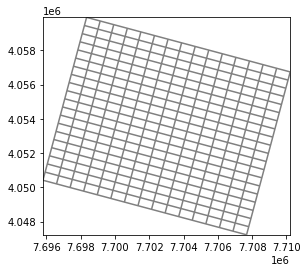

In [40]:
conv = 3.28084
mg2 = flopy.discretization.StructuredGrid(
    modelgrid.delc * conv,
    modelgrid.delr * conv,
    modelgrid.top * conv,
    modelgrid.botm * conv,
    modelgrid.idomain,
    xoff=xoff * conv,
    yoff=yoff * conv,
    angrot=angrot
)
print(mg2)
mg2.plot();